# PDEs

Consider a 2nd order PDE Governing $\Psi$

$a\partial_x^2 \Psi + b\partial_x\partial_y\Psi+c\partial_y^2+d\partial_x\Psi+e\partial_y\Psi+f=0$

Where $a,b,c,d,e,f$ are constants.

PDEs come in three forms:

1. Elliptical if $b^2-4ac<0$. e.g. gravitational (Poisson's Eqn),electrostatics,etc.
2. Parabolic if $b^2-4ac=0$. This is if information travels through diffusive processes (e.g. heat transfer)
3. Hyperbolic if $b^2-4ac>0$. This is if information propagates as waves (e.g. water waves, EM, soundwaves)

Hyperbolic and Parabolic PDEs are initial value problems ('Time Evolution Problem').

Of course to solve these we require an initial condition at $t=0$ and spatial boundary conditions. Numerically though, we can advance the solution at each time slice (i.e. completing each time 'row' 'row' by 'row'). This means we only need to store one (or a few) rows in memory.

Elliptic PDEs are boundary value problems, which hav ea static solution. To do this though, all grid points have to be maintained in memory

Quick interlude! Turns out that we can find a better approximation to the derivative, which is the centred difference method. As a summary.

Forward:
$\frac{du}{dx}\Bigr|_{x=x_i}=\frac{u_{i+1}-u_i}{\delta x}$

Backward:
$\frac{du}{dx}\Bigr|_{x=x_i}=\frac{u_{i}-u_{i-1}}{\delta x}$

Centred:
$\frac{du}{dx}\Bigr|_{x=x_i}=\frac{u_{i+1}-u_{i-1}}{2\delta x}$

This is 3rd order local accurate!

Also consider this scheme (which is 4th order local):

$\frac{du}{dx}\Bigr|_{x=x_i}=\frac{u_{i+2}-u_{i-2}+8u_{i+1}-8u_{i-1}}{12\delta x}$

However also note that we require more data points for more accurate schemes. For Forward and backward we require 2 sets of points $\{u_{i+1},u_i\}$. For Centred we need 3 points $\{u_{i+1},u_i,u_{i-1}\}$. For the last one we need 5.

So the more accurate the approximation, the larger 'stencil' we need, and thus the larger computational cost

Do we always get a better answer by decreasing $\delta x$? 

Generally no, because there are round-off errors that the computer inevitably makes! Since the Euler scheme divides the stepsize, errors get magnified the smaller the step size is. So decreasing truncation error increases round-off error and vice versa.

Generally the minimum stepsize is (for the centred difference method):

$\delta x=(\frac{3\epsilon_r}{m})^{\frac{1}{3}}$

Where $\epsilon_r$ is the round off error of order $10^{-16}$ and $m=u_{xxx}(x_0)$. If we take this to be of order $1$ then we get a minimum stepsize of:

$\delta x \sim 10^{-5}$

Let's code these different derivatives!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def FEuler(f,x):
    #This function returns a numpy array of the same dimension of x of the derivative of f evaluated at those x points, using the numerical Forward Euler Scheme
    #f = lambda function of f that is to be differentiated
    #x = 1D numpy array
    dx=x[1]-x[0]
    d=np.zeros(len(x))
    for k in range(len(x)-1):
        d[k]=(f(x[k+1])-f(x[k]))/dx
    
    return d

In [25]:
def BEuler(f,x):
    #This function returns a numpy array of the same dimension of x of the derivative of f evaluated at those x points, using the numerical Backward Euler Scheme
    #f = lambda function of f that is to be differentiated
    #x = 1D numpy array
    dx=x[1]-x[0]
    d=np.zeros(len(x))
    for k in range(1,len(x)):
        d[k]=(f(x[k])-f(x[k-1]))/dx
    
    return d

In [43]:
def CDiff(f,x):
    
    dx=x[1]-x[0]
    d=np.zeros(len(x))
    
    d[0]=(f(x[1])-f(x[0]))/dx
    
    for k in range(1,len(x)-2):
        d[k]=(f(x[k+1])-f(x[k-1]))/(2*dx)
        
    d[len(x)-1]=(f(x[len(x)-1])-f(x[len(x)-2]))/dx
    
    return d

In [46]:
xi=0
xf=np.pi
dx=0.05

xt=np.arange(xi,xf,0.01)
y=np.sin(2*xt)
dt=2*np.cos(2*xt)

x=np.arange(xi,xf,dx)

dF=FEuler(lambda t:np.sin(2*t),x)
dB=BEuler(lambda t:np.sin(2*t),x)
dC=CDiff(lambda t: np.sin(2*t),x)

Text(0.5, 0, 'x')

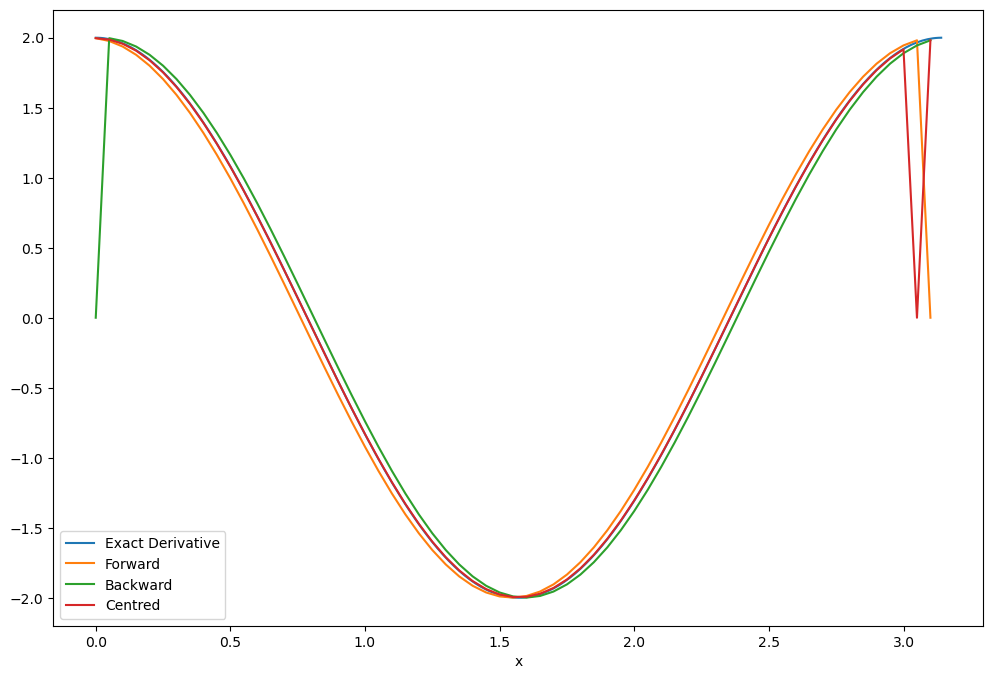

In [47]:
fig=plt.figure(figsize=(12,8))

#plt.plot(xt,y,label='Function')
plt.plot(xt,dt,label='Exact Derivative')
plt.plot(x,dF,label='Forward')
plt.plot(x,dB,label='Backward')
plt.plot(x,dC,label='Centred')
plt.legend()
plt.xlabel('x')